# Pluto's Orbit, and Validating Kepler's Second Law

## Eriel Wiston and Alexandra Maycock

## Q: Is Kepler's Second Law satisfied when tested against Pluto's highly eccentric orbit?

In [76]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [77]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [78]:
#Below are the initial conditions, which initialize
#PLuto's radius and velocity at perihelion (the point
#at which its distance from the sun is smallest). All
#other positions and velocities are initialized to 0.
r_0 = 4436.82e9 * m
v_0 = -6100 * m/s

init = State(x = r_0,
             y = 0 * m/s,
             vx = 0 * m / s,
             vy = v_0)

,values
x,4436820000000.0 meter
y,0.0 meter / second
vx,0.0 meter / second
vy,-6100.0 meter / second


In [96]:
#Now, we make the system object, which contains
#Pluto's radius, the sun's radius, the combined radius
#of Pluto and the sun, the State object,the masses of
#Pluto and the sun, the start and end time, and the
#gravitational constant.

r_pluto = 1187000 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_pluto,
                m2=0.01303e24 * kg,
                t_0=0 * s,
                t_end=7820000000 * s,
                slices = 2000)

,values
init,x 4436820000000.0 meter y 0.0 met...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,696695000.0 meter
m2,1.303e+22 kilogram
t_0,0 second
t_end,7820000000 second
slices,2000


In [97]:
#This function computes the force of gravity, using
#universal gravitation.

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    r = Vector(x, y)
    v = Vector(vx, vy)
 
    force_mag = G * m1 * m2 / r.mag**2
    force = r.hat() * force_mag 
   # force = Vector(G*m1*m2/x**2, G*m1*m2/y**2)
    return force

In [98]:
universal_gravitation(init, system)

<Quantity([8.78661872e+16 0.00000000e+00], 'newton')>

In [99]:
#The slope function calculates velocity and acceleration
#for each time step in our orbit

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    

    force_x, force_y = universal_gravitation(state, system)
    dxdt = vx
    dydt = vy
    dvxdt = -force_x / m2
    dvydt = -force_y / m2
    
    return dxdt, dydt, dvxdt, dvydt

In [100]:
slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-6100.0, 'meter / second')>,
 <Quantity(-6.743375839653671e-06, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [101]:
#Event function that stops the simulation upon collision

def event_func(state, t, system):
    x, y, vx, vy = state
    position = Vector(x,y)
    return position.mag - system.r_final

In [102]:
events = event_func(init, 0, system)

<Quantity(4436123305000.0, 'meter')>

In [103]:
dt = (system.t_end - system.t_0)/ system.slices
times = (linrange(system.t_0, system.t_end, dt))

<Quantity([0.00000e+00 3.91000e+06 7.82000e+06 ... 7.80827e+09 7.81218e+09
 7.81609e+09], 'second')>

In [104]:
#Here, we test all the functions together

results, details = run_ode_solver(system, slope_func, events=event_func, t_eval = times)
details

,values
sol,None
t_events,[[]]
nfev,158
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [105]:
results

,x,y,vx,vy
0.000000e+00,4.436820e+12,0.000000e+00,0.000000,-6100.000000
3.910000e+06,4.436768e+12,-2.385091e+10,-26.366423,-6099.929131
7.820000e+06,4.436614e+12,-4.770126e+10,-52.731785,-6099.716529
1.173000e+07,4.436356e+12,-7.155051e+10,-79.095027,-6099.362211
1.564000e+07,4.435995e+12,-9.539809e+10,-105.455087,-6098.866201
1.955000e+07,4.435531e+12,-1.192435e+11,-131.810907,-6098.228538
2.346000e+07,4.434965e+12,-1.430861e+11,-158.161427,-6097.449268
2.737000e+07,4.434295e+12,-1.669253e+11,-184.505618,-6096.528439
3.128000e+07,4.433522e+12,-1.907608e+11,-210.842667,-6095.466033
3.519000e+07,4.432646e+12,-2.145919e+11,-237.171529,-6094.262127


In [106]:
#We do not expect Pluto to collide with the sun in 
#its regular orbit, so our final time should be a 
#full year, which is how many seconds we started with

t_final = get_last_label(results) * s

<Quantity(7816090000.0, 'second')>

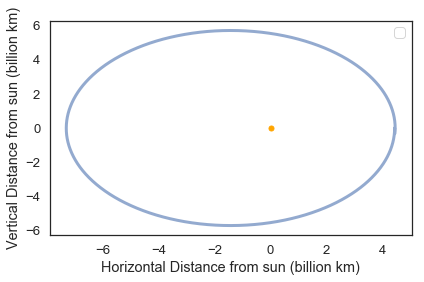

In [107]:
#ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, events=event_func, method='RK23', t_eval=times)

#Our results are scaled to Earth days
results.index /= 60 * 60 * 24

#And to billions of kilometers, and plotted
x = results.x / 1e12;
y = results.y /1e12;
plot(x, y)

#Look! The sun is an orange dot! Isn't that neat?
plt.plot(0, 0, marker='o', markersize=5, color="orange")

decorate(xlabel='Horizontal Distance from sun (billion km)',
         ylabel='Vertical Distance from sun (billion km)')

In [108]:
S = results.index[0]
E = results.index[1]
a_vec = Vector(results.x[results.index[0]], results.y[results.index[0]])
A = a_vec.mag
b_vec = Vector(results.x[results.index[1]], results.y[results.index[1]])
B = b_vec.mag
C = sqrt((results.x[results.index[1]]-results.x[results.index[0]])**2 +(results.y[results.index[1]]-results.y[results.index[0]])**2 )
SP = (A+B+C)/2
area = sqrt(SP * (SP - A) * (SP - B) * (SP - C))

state= State(S=S, E=E, A=A, B=B, C=C, SP=SP, area=area)

,values
S,0
E,45.2546
A,4436820000000.0 dimensionless
B,4436832562882.295 dimensionless
C,2.3851e+10
SP,4448751763136.124 dimensionless
area,5.291109213451941e+22 dimensionless


In [109]:
def area_of_sector(results,system,state):
    unpack(system)
    
    dt = (t_end-t_0)/slices
    
    t_interval = linrange(t_0,t_end,dt)
    
    frame = TimeFrame(columns = state.index)
    frame.row[1] = state
     
    reps = linrange (1, slices)
    
    for t in reps:
        frame.row[t+1] = table_row(frame.row[t], t, system, results)
        
    return frame
    

In [110]:
def table_row(state, t , system, results):
    s, e, a, b, c, sp, area = state
    unpack(system)
    
    dt = (t_end-t_0)/slices/UNITS.s
    news = e
    newe = news + dt
    
    
    a_vec = Vector(results.x[results.index[t-1]], results.y[results.index[t-1]])       
    newa = a_vec.mag
    
    b_vec = Vector(results.x[results.index[t]], results.y[results.index[t]])
    newb = b_vec.mag 

    newc = sqrt((results.x[results.index[t]]-results.x[results.index[t-1]])**2 +(results.y[results.index[t]]-results.y[results.index[t-1]])**2 )
    
    newsp = (newa + newb + newc)/2
    newarea = sqrt(newsp * (newsp - newa) * (newsp - newb) * (newsp - newc))
    
    return State (S=news, E=newe, A=newa, B=newb, C=newc, SP=newsp, area=newarea)
    
    
    

In [111]:
numbs = area_of_sector(results, system, state)

,S,E,A,B,C,SP,area
1,0,45.2546,4436820000000.0 dimensionless,4436832562882.295 dimensionless,2.385096e+10,4448751763136.124 dimensionless,5.291109213451941e+22 dimensionless
2,45.2546,3910045.2546296297 dimensionless,4436820000000.0 dimensionless,4436832562882.295 dimensionless,2.385096e+10,4448751763136.124 dimensionless,5.291109213451941e+22 dimensionless
3,3910045.2546296297 dimensionless,7820045.25462963 dimensionless,4436832562882.295 dimensionless,4436870269641.3 dimensionless,2.385086e+10,4448776843943.656 dimensionless,5.291109345233894e+22 dimensionless
4,7820045.25462963 dimensionless,11730045.25462963 dimensionless,4436870269641.3 dimensionless,4436933119957.921 dimensionless,2.385064e+10,4448827014049.048 dimensionless,5.291109436062589e+22 dimensionless
5,11730045.25462963 dimensionless,15640045.25462963 dimensionless,4436933119957.921 dimensionless,4437021101770.312 dimensionless,2.385031e+10,4448902267181.994 dimensionless,5.2911094505689865e+22 dimensionless
6,15640045.25462963 dimensionless,19550045.25462963 dimensionless,4437021101770.312 dimensionless,4437134197853.589 dimensionless,2.384988e+10,4449002588749.45 dimensionless,5.291109403907696e+22 dimensionless
7,19550045.25462963 dimensionless,23460045.25462963 dimensionless,4437134197853.589 dimensionless,4437272385823.546 dimensionless,2.384933e+10,4449127959015.787 dimensionless,5.291109316949661e+22 dimensionless
8,23460045.25462963 dimensionless,27370045.25462963 dimensionless,4437272385823.546 dimensionless,4437435675907.29 dimensionless,2.384869e+10,4449278373873.058 dimensionless,5.291110017035608e+22 dimensionless
9,27370045.25462963 dimensionless,31280045.25462963 dimensionless,4437435675907.29 dimensionless,4437624372834.008 dimensionless,2.384796e+10,4449454004289.0 dimensionless,5.291117147234206e+22 dimensionless
10,31280045.25462963 dimensionless,35190045.25462963 dimensionless,4437624372834.008 dimensionless,4437838535180.914 dimensionless,2.384713e+10,4449655017659.723 dimensionless,5.291124864292203e+22 dimensionless


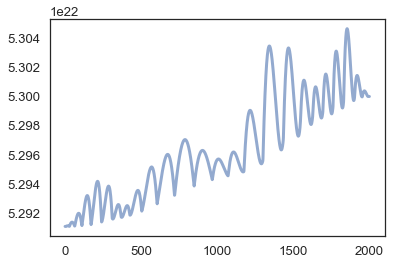

In [112]:
plot(numbs.area)